<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #1: ES models </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 
This is first laboratory task for the course TSA.
The Lab is desinged to impove skills of tuning parameters of ES models and get experience of coding of simple Regression Models.

The Lab should take about 5-6 hours to be completed.

<h1 align="center">Important Info</h1> 
- <span style="font-size: 14pt;"> You must send your solution to the email </span> <span style="color:red; font-size: 12pt;">alexromsput@gmail.com, </span>
- The theme of your message must be <span style="color:red; font-size: 12pt;"> TSA-Erevan-2017-[Your Surname] </span>, for exmaple -- TSA-Erevan-2017-Romanenko,
- The file in attachment of the letter must be named as <span style="color:red; font-size: 12pt;"> [Surname]-[Group]-Lab1.ipnb</span>, for example -- Romanenko-Evening-Lab1.ipnb,
  
<span style="color:red; font-size: 14pt;"> DEADLINE: 7 June 2017 23:59:59 </span>


<h1 align="center">1. Realization of ES models(50%)</h1>
Solve the task fo Prcatice Day 1 and put you solution (that means cells and outputs) below

https://github.com/garik347/aca_projects/tree/master/time_Series/Vazgen

<h1 align="center">2. Forecasting real TS (50%)</h1>

* I.   Download datasets (see Student ID in sheet 'Notes' <a href="https://drive.google.com/open?id=11-lzxxR0aeBmEDGEW1GiIaP4X3fyCTHxTg4b0wALpzs">here </a>) and put it into pandas Data Frame:
     - for those whose Student ID = 0 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> 
     - for those whose Student ID = 1 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> 
     - for those whose Student ID = 2 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>
     
<a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link to the folder with datasets</a>

Answer questions: are there TS with seaonality in data? which is the seasonality period?
(Hint: you just need to look at aggregate data by each shop).

* II. Define the beginning of the history and the end of the history of TS (for TS_dep36.csv the beginning is 12.05.2005, the end is 13.06.2006)
    
* III. For TS_dep36.csv Find the best ES algorithm (it means ES model + its optimal parameters) for each TS by next sheme:
     
     
     - 0) Use only following ES models: IES (see seminar 2), AES (see seminar 2), Winters with additive seasonality (see Practice Day 1 task 3), Theil-Wage (see Practice Day 1 task 4).
     
     
     - 1) forecasting delay $h = 1$, loss function is MACAPE;
     
     
     - 2) For all models find optimal params of each ES models using first 75% of dates (for TS_dep36.csv from 12.05.2005 to 12.03.2006);
     
     
     - 3) forecast each TS by each ES Model with optimal params using first 90% of dates (for TS_dep36.csv from 12.05.2005 to 30.04.2006);
     - 4) find the optimal ES algorithm: just compare losses of ES models with optimal params calclated for dates that were not used for tuning parameters (for TS_dev36.csv: from 13.03.2006 to 30.04.2006).
    
    You need to remember optimal ES algorithm for each TS!
    
     - 5) Build barchar (histogram) of losses of optimal ES algorithm (were calulated at step before) for all TS (axis x - value of loss, axis y - percentage of TS that have such loss). Here you must exclude those TS which has only NaNs in period under consideration.
            
* IV. Calculate Forecast for each TS by optimal TS algorithm that you find in step 3 for all dates (for TS_dep36.csv from 12.05.2005 to 13.06.2006). 

       
     - 1) Measure accuracy (loss) of forecast for each TS using dates that were not used in step 2)-3) (for TS_dep36.csv from 12.05.2005 to 12.03.2006), here you must exclude those TS which has only NaNs in the end.
    
     - 2) Build barchar (histogram) of losses of optimal ES algorithm for all TS (axis x - value of loss, axis y - percentage of TS that has such loss), here you must exclude those TS which has only NaNs in period under consideration.

     - 3) Are barcharts calculated in step III.4) and in step IV.2) the same? If they differ than say in what manner.

C:\Users\Vazgen\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.

C:\Users\Vazgen\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



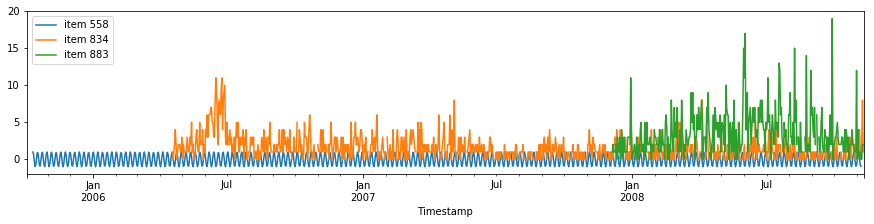

In [1]:
import pandas as pd
import numpy as np
from utils import qualityRMSE, qualityMedianAE
from utils import ExponentialSmoothing
from datetime import datetime, timedelta
import pylab
import matplotlib.pyplot as plt
import math
import pandas.tseries.offsets as ofs
import warnings as w
from matplotlib import gridspec
import plotly.plotly as py

from IPython.display import Image

import statsmodels.api as sm

%matplotlib inline


ts_dep42=pd.read_csv('TS_dep42.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True).convert_objects(convert_numeric=True)
ts_dep42[ts_dep42.columns[:3]].plot(figsize=(15,3))

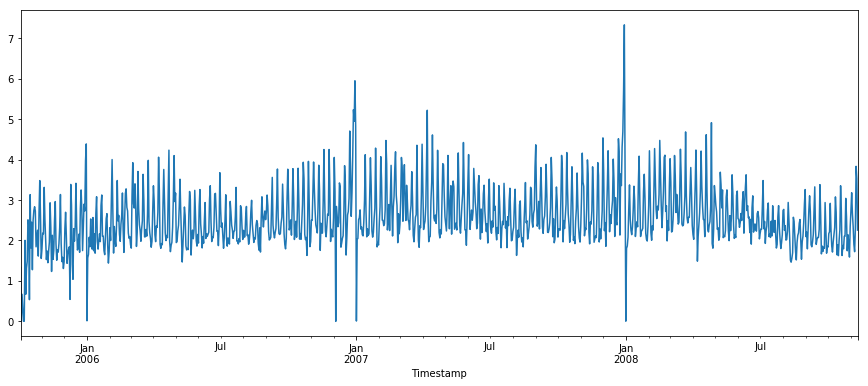

In [2]:
ts_agg = ts_dep42.mean(axis = 1)
ts_agg.plot(figsize=(15,6))

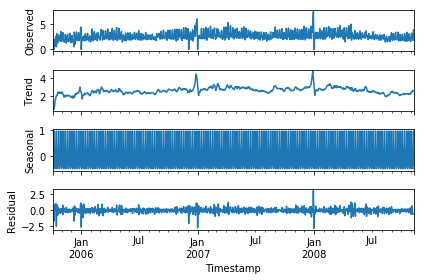

In [3]:
res = sm.tsa.seasonal_decompose(ts_agg)
resplot = res.plot()

In [4]:
(res.seasonal-res.seasonal.shift(7))[7:].max()

0.0

In [5]:
(res.seasonal-res.seasonal.shift(7))[7:].min()

0.0

In [6]:
(res.seasonal-res.seasonal.shift(1))[1:].max()

0.67859153341987011

So seasonality is equal to 7.

In [7]:
ts_dep42

,item 558,item 834,item 883,item 1311,item 1396,item 1647,item 1689,item 1761,item 1969,item 2036,...,item 77539,item 79279,item 80510,item 82356,item 87639,item 88121,item 89103,item 89977,item 95417,item 96668
Timestamp,,,,,,,,,,,,,,,,,,,,,
2005-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-11,0.992568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
begining='2005-10-03'
end='2008-11-10'

In [9]:
#0)
def InitExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    t0=0
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha*(t-t0+1)/(AdaptationPeriod)) + alpha*(t-t0+1)/(AdaptationPeriod)*x[t]
            y = y*(1-alpha) + alpha*x[t]
            #else do not nothing
        FORECAST[t+h] = y
    return FORECAST

In [10]:
def AdaptiveExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = np.NaN
    t0= np.NaN
    e1= np.NaN
    e2= np.NaN
    Kt_1 = alpha
    K=alpha
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
                e1=alpha
                e2 = 1
            else:
                if (t-t0)<h:
                    e1 = gamma*(x[t]-y)+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-y)+(1-gamma)*e2
                else:
                    e1 = gamma*(x[t]-FORECAST[t])+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-FORECAST[t])+(1-gamma)*e2
            
            if e2==0:
                K=alpha
            else:
                K=np.abs(e1/e2)

            alpha=Kt_1
            Kt_1=K

            if t<AdaptationPeriod:
                y = y*(1-alpha*(t-t0+1)/(AdaptationPeriod)) + alpha*(t-t0+1)/(AdaptationPeriod)*x[t]
            y = y*(1-alpha) + (alpha)*x[t]
            #else do not nothing
        FORECAST[t+h] = y
    return FORECAST

In [37]:
def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)## put forecast of the model here
    
    l=0 # initialize ts level 
    s=[np.NaN]*p # initalize seasonality values (it must be vector of lenth p)
    s=np.array(s)
    s[0]=x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= s[cntr % p-1]# initialize 
            s_saved=s[cntr%p]
            s[cntr%p] = delta*(x[cntr]-l)+(1-delta)*s[cntr%p]# recurrent smoothing of seasonality
            l = alpha*(x[cntr]-s_saved)+(1-alpha)*l# recurrent smoothing of level 
        FORECAST[cntr+h] = l + s[(cntr+h % p)%p]
    return FORECAST

In [38]:
def TheilWageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)## put forecast of the model here
    b=0
    l=0 # initialize ts level 
    s=[np.NaN]*p # initalize seasonality values (it must be vector of lenth p)
    s=np.array(s)
    s[0]=x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= s[cntr % p-1]# initialize 
            if math.isnan(b):
                b=x[cntr]
            l_saved=l
            l = alpha*(x[cntr]-s[cntr%p])+(1-alpha)*(l+b)
            s[cntr%p] = gamma*(x[cntr]-l)+(1-gamma)*s[cntr%p]# recurrent smoothing of seasonality
            b = beta*(l-l_saved)+(1-beta)*b
        FORECAST[cntr+h] = l + b*h + s[(cntr+h % p)%p]
    return FORECAST

In [13]:
#1)
h=1

In [14]:
def qualityMACAPE(x,y):
    
    qlt = ((2*(x-y)/(x+y)).abs()).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , qlt

In [15]:
1135*3/4

851.25

In [16]:
ts_dep42.iloc[851]

item 558       0.596895
item 834       0.000000
item 883       3.000000
item 1311      6.000000
item 1396      3.000000
item 1647      1.000000
item 1689      0.000000
item 1761      7.000000
item 1969      0.000000
item 2036           NaN
item 2238      2.000000
item 2697     19.000000
item 2826     11.000000
item 7968      0.000000
item 8670      1.000000
item 9018      0.000000
item 9626      4.000000
item 10113     4.000000
item 10654     4.000000
item 10864     3.000000
item 11402     1.000000
item 11865     1.000000
item 13233     3.000000
item 13461     0.000000
item 14157     0.000000
item 14202     5.000000
item 14435     0.000000
item 14475     6.000000
item 14679     3.000000
item 14870     1.000000
                ...    
item 54606    18.000000
item 55515     1.000000
item 55517     1.000000
item 56486     1.000000
item 58076     3.000000
item 59696     7.000000
item 61583     0.000000
item 61969     1.000000
item 62734     9.000000
item 64605     3.212000
item 64742     3

In [17]:
#2)
ts_train=ts_dep42.loc[:'2008-02-01']
ts_test=ts_dep42.loc['2008-02-01':]

In [18]:
rng = pd.date_range(ts_train.index[-1]+timedelta(h), ts_train.index[-1]+timedelta(h))

frc_ts_IES = pd.DataFrame(index = ts_train.index.append(rng), columns = ts_train.columns)

constants = [0, 0.05, 0.1, 0.3, 0.6, 0.8 ,0.95, 1]
best_alpha_IES={}
min_loss_IES={}
for cntr in ts_train.columns:
    min_loss_IES[cntr]=np.inf
    best_alpha_IES[cntr]=np.nan
for cntr in ts_train.columns:
    for alpha in constants:
        Params={'alpha':alpha, 'AdaptationPeriod':10}
        frc_ts_IES[cntr] = InitExponentialSmoothing(ts_train[cntr], h, Params)
        Quality = qualityMACAPE(ts_train[cntr], frc_ts_IES[cntr])[0]
        if Quality<min_loss_IES[cntr]:
            min_loss_IES[cntr]=Quality
            best_alpha_IES[cntr]=alpha

In [19]:
rng = pd.date_range(ts_train.index[-1]+timedelta(h), ts_train.index[-1]+timedelta(h))

frc_ts_AES = pd.DataFrame(index = ts_train.index.append(rng), columns = ts_train.columns)

constants = [0, 0.05, 0.1, 0.3, 0.6, 0.8 ,0.95, 1]
min_loss_AES={}
best_alpha_AES={}
best_gamma_AES={}
for cntr in ts_train.columns:
    min_loss_AES[cntr]=np.inf
    best_alpha_AES[cntr]=np.nan
    best_gamma_AES[cntr]=np.nan
for cntr in ts_train.columns:
    for alpha in constants:
        for gamma in constants:
            Params={'alpha':alpha, 'gamma':gamma, 'AdaptationPeriod':10}
            frc_ts_AES[cntr] = AdaptiveExponentialSmoothing(ts_train[cntr], h, Params)
            Quality = qualityMACAPE(ts_train[cntr], frc_ts_AES[cntr])[0]
            if Quality<min_loss_AES[cntr]:
                min_loss_AES[cntr]=Quality
                best_alpha_AES[cntr]=alpha
                best_gamma_AES[cntr]=gamma

In [26]:
rng = pd.date_range(ts_train.index[-1]+timedelta(h), ts_train.index[-1]+timedelta(h))

frc_ts_WES = pd.DataFrame(index = ts_train.index.append(rng), columns = ts_train.columns)

constants = [0, 0.05, 0.1, 0.3, 0.6, 0.8 ,0.95, 1]
min_loss_WES={}
best_alpha_WES={}
best_delta_WES={}
for cntr in ts_train.columns:
    min_loss_WES[cntr]=np.inf
    best_alpha_WES[cntr]=np.nan
    best_delta_WES[cntr]=np.nan

for cntr in ts_train.columns:
    for alpha in constants:
        for delta in constants:
            Params={'alpha':alpha, 'delta':delta, 'seasonality_period':7}
            frc_ts_WES[cntr] = WintersExponentialSmoothing(ts_train[cntr], h, Params)
            Quality = qualityMACAPE(ts_train[cntr], frc_ts_WES[cntr])[0]
            if Quality<min_loss_WES[cntr]:
                min_loss_WES[cntr]=Quality
                best_alpha_WES[cntr]=alpha
                best_delta_WES[cntr]=delta
                

In [27]:
rng = pd.date_range(ts_train.index[-1]+timedelta(h), ts_train.index[-1]+timedelta(h))

frc_ts_TWES = pd.DataFrame(index = ts_train.index.append(rng), columns = ts_train.columns)

constants = [0, 0.05, 0.2, 0.6 ,0.95]
min_loss_TWES={}
best_alpha_TWES={}
best_beta_TWES={}
best_gamma_TWES={}
for cntr in ts_train.columns:
    min_loss_TWES[cntr]=np.inf
    best_alpha_TWES[cntr]=np.nan
    best_beta_TWES[cntr]=np.nan
    best_gamma_TWES[cntr]=np.nan

for cntr in ts_train.columns:
    for alpha in constants:
        for beta in constants:
            for gamma in constants:
                Params={'alpha':alpha, 'beta':beta, 'gamma':gamma, 'seasonality_period':7}
                frc_ts_TWES[cntr] = TheilWageExponentialSmoothing(ts_train[cntr], h, Params)
                Quality = qualityMACAPE(ts_train[cntr], frc_ts_TWES[cntr])[0]
                if Quality<min_loss_WES[cntr]:
                    min_loss_TWES[cntr]=Quality
                    best_alpha_TWES[cntr]=alpha
                    best_beta_TWES[cntr]=beta
                    best_gamma_TWES[cntr]=gamma

NameError: name 'd' is not defined

In [28]:
ts_dep42

,item 558,item 834,item 883,item 1311,item 1396,item 1647,item 1689,item 1761,item 1969,item 2036,...,item 77539,item 79279,item 80510,item 82356,item 87639,item 88121,item 89103,item 89977,item 95417,item 96668
Timestamp,,,,,,,,,,,,,,,,,,,,,
2005-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-11,0.992568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
1135*0.9

1021.5

In [30]:
ts_dep42.iloc[1021]

item 558       0.28176
item 834       2.00000
item 883       6.00000
item 1311      1.00000
item 1396      3.00000
item 1647      3.00000
item 1689      3.00000
item 1761      2.00000
item 1969      0.00000
item 2036      1.00000
item 2238      2.00000
item 2697      2.00000
item 2826      3.00000
item 7968      2.37000
item 8670      2.00000
item 9018      3.00000
item 9626      0.00000
item 10113     3.00000
item 10654     2.00000
item 10864     7.00000
item 11402     0.00000
item 11865     1.00000
item 13233     1.00000
item 13461     2.00000
item 14157     4.00000
item 14202     2.00000
item 14435     0.00000
item 14475     0.00000
item 14679     1.00000
item 14870     4.00000
                ...   
item 54606     0.00000
item 55515     0.00000
item 55517     2.00000
item 56486     0.00000
item 58076     3.00000
item 59696     1.00000
item 61583     5.00000
item 61969     1.00000
item 62734     8.00000
item 64605     0.00000
item 64742     2.00000
item 65520     0.00000
item 68836 

In [32]:
ts_f=ts_dep42.loc[:'2008-07-20']

In [41]:
#3)
h = 1
rng = pd.date_range(ts_f.index[-1]+timedelta(h), ts_f.index[-1]+timedelta(h))
frc_ts_IES = pd.DataFrame(index = ts_f.index.append(rng), columns = ts_f.columns)
frc_ts_AES = pd.DataFrame(index = ts_f.index.append(rng), columns = ts_f.columns)
frc_ts_WES = pd.DataFrame(index = ts_f.index.append(rng), columns = ts_f.columns)
frc_ts_TWES = pd.DataFrame(index = ts_f.index.append(rng), columns = ts_f.columns)


for cntr in ts_f.columns:


    frc_ts_IES[cntr] = InitExponentialSmoothing(ts_f[cntr], h, {'alpha':best_alpha_IES[cntr], 'AdaptationPeriod':10})

    frc_ts_AES[cntr] = AdaptiveExponentialSmoothing(ts_f[cntr], h, {'alpha':best_alpha_AES[cntr],
                                                                    'gamma':best_gamma_AES[cntr],
                                                                    'AdaptationPeriod':10})
    

    frc_ts_WES[cntr] = WintersExponentialSmoothing(ts_f[cntr], h, {'alpha':best_alpha_WES[cntr], 
                                                                   'delta':best_delta_WES[cntr],
                                                                   'seasonality_period': 7})


    frc_ts_TWES[cntr] = TheilWageExponentialSmoothing(ts_f[cntr], h, {'alpha':best_alpha_TWES[cntr], 
                                                                       'beta':best_beta_TWES[cntr],
                                                                       'gamma':best_gamma_TWES[cntr],
                                                                       'seasonality_period': 7})

In [45]:
#4)
alg={'IES': frc_ts_IES.loc['2008-02-01':'2008-07-20'], 'AES': frc_ts_AES.loc['2008-02-01':'2008-07-20'],
    'WES': frc_ts_WES.loc['2008-02-01':'2008-07-20'], 'TWES':frc_ts_TWES.loc['2008-02-01':'2008-07-20']}

min_loss_alg = {}
the_best_alg = {}

for cntr in ts_f.columns:
    min_loss_alg[cntr] = np.inf
    the_best_alg[cntr] = ''
    for a in alg:
        if abs(qualityMACAPE(ts_dep42.loc['2008-02-01':'2008-07-20'][cntr], alg[a][cntr])[0])<min_loss_alg[cntr]:

            the_best_alg[cntr] = a
            min_loss_alg[cntr] = abs(qualityMACAPE(ts_dep42.loc['2008-02-01':'2008-07-20'][cntr], alg[a][cntr])[0])

    print('The optimal algorithm for ' + cntr + ' is '+ the_best_alg[cntr] + ' and loss is '+ str(min_loss_alg[cntr]))

The optimal algorithm for item 558 is IES and loss is 2.209660871132574
The optimal algorithm for item 834 is AES and loss is 0.9878459751503658
The optimal algorithm for item 883 is IES and loss is 0.5665751044748832
The optimal algorithm for item 1311 is IES and loss is 0.8503843651414097
The optimal algorithm for item 1396 is IES and loss is 0.7253398388956235
The optimal algorithm for item 1647 is IES and loss is 0.8100526266008136
The optimal algorithm for item 1689 is IES and loss is 0.8927135887812409
The optimal algorithm for item 1761 is IES and loss is 0.5972134077638415
The optimal algorithm for item 1969 is IES and loss is 0.531212753934772
The optimal algorithm for item 2036 is IES and loss is 0.8600762347431236
The optimal algorithm for item 2238 is IES and loss is 0.5744237265389001
The optimal algorithm for item 2697 is IES and loss is 0.5559720593038686
The optimal algorithm for item 2826 is AES and loss is 0.9810687601106164
The optimal algorithm for item 7968 is IES 

(array([  1.,   2.,   4.,   8.,   8.,   8.,   7.,   8.,  13.,  12.,  12.,
          8.,   7.,   7.,  14.,   7.,   4.,  10.,   7.,   0.,   2.,   2.,
          0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.40454586,  0.44064816,  0.47675046,  0.51285276,  0.54895506,
         0.58505736,  0.62115966,  0.65726196,  0.69336426,  0.72946656,
         0.76556886,  0.80167116,  0.83777346,  0.87387576,  0.90997806,
         0.94608036,  0.98218266,  1.01828496,  1.05438726,  1.09048956,
         1.12659186,  1.16269416,  1.19879646,  1.23489876,  1.27100106,
         1.30710336,  1.34320566,  1.37930796,  1.41541027,  1.45151257,
         1.48761487,  1.52371717,  1.55981947,  1.59592177,  1.63202407,
         1.66812637,  1.70422867,  1.74033097,  1.77643327,  1.81253557,
         1.84863787,  1.88474017,  1.92084247,  1.95694477,  1.99304707,
 

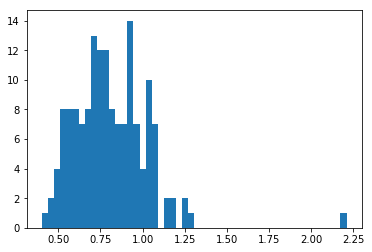

In [57]:
plt.hist(list(min_loss_alg.values()), bins = 50)

In [53]:
list(min_loss_alg.values())

[2.209660871132574,
 0.9878459751503658,
 0.5665751044748832,
 0.8503843651414097,
 0.7253398388956235,
 0.8100526266008136,
 0.8927135887812409,
 0.5972134077638415,
 0.531212753934772,
 0.8600762347431236,
 0.5744237265389001,
 0.5559720593038686,
 0.9810687601106164,
 0.7760591092903563,
 0.7881389531761988,
 0.7059331047764785,
 0.9343460935399042,
 0.6216945086563925,
 0.75758688548222,
 0.5419564346099831,
 0.7918540816447648,
 0.639395657252801,
 0.7869477911646593,
 1.0322995240073074,
 0.7446110767539359,
 0.6964371030197415,
 0.7685156853559171,
 0.8288625377591524,
 0.5614460935889511,
 0.8198489092606746,
 0.547541304486399,
 1.240262984603572,
 0.7561035672988317,
 1.0423347424350573,
 0.9582644943096332,
 1.017226390513382,
 0.4045458575781442,
 0.8022604624669545,
 0.9804294166378533,
 0.7656293760588688,
 0.6087616557444127,
 0.6885194270194605,
 0.7269433621081448,
 0.4415081804131842,
 0.5226848781954014,
 1.064795382395383,
 0.9979142151489324,
 0.9230552910224616,
 

In [58]:
ts_dep42.loc['2008-02-01':'2008-07-20']

,item 558,item 834,item 883,item 1311,item 1396,item 1647,item 1689,item 1761,item 1969,item 2036,...,item 77539,item 79279,item 80510,item 82356,item 87639,item 88121,item 89103,item 89977,item 95417,item 96668
Timestamp,,,,,,,,,,,,,,,,,,,,,
2008-02-01,0.596895,0.0,3.0,6.0,3.0,1.0,0.0,7.0,0.0,NaN,...,1.0,5.0,5.0,1.0,2.0,1.0,NaN,2.0,3.0,1.0
2008-02-02,-0.352625,2.0,3.0,5.0,7.0,1.0,2.0,11.0,3.0,10.0,...,2.0,4.0,5.0,4.0,2.0,2.0,3.0,3.0,4.0,7.0
2008-02-03,-0.977943,1.0,2.0,3.0,4.0,3.0,2.0,10.0,5.0,2.0,...,3.0,4.0,4.0,4.0,1.0,1.0,3.0,7.0,4.0,2.0
2008-02-04,-0.704144,0.0,2.0,1.0,5.0,1.0,0.0,5.0,5.0,1.0,...,3.0,3.0,2.0,2.0,1.0,1.0,2.0,3.0,0.0,3.0
2008-02-05,0.217041,3.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,0.0,...,0.0,3.0,0.0,NaN,0.0,0.0,4.0,2.0,4.0,1.0
2008-02-06,0.938680,0.0,1.0,1.0,8.0,NaN,NaN,5.0,5.0,6.0,...,0.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,2.0,2.0
2008-02-07,0.797301,1.0,4.0,0.0,3.0,1.0,2.0,5.0,4.0,3.0,...,0.0,0.0,0.0,0.0,4.0,0.0,2.0,1.0,6.0,3.0
2008-02-08,-0.077113,1.0,3.0,7.0,5.0,3.0,2.0,11.0,6.0,3.0,...,NaN,NaN,0.0,NaN,2.0,0.0,3.0,6.0,6.0,3.0
2008-02-09,-0.880630,4.0,1.0,10.0,5.0,1.0,3.0,5.0,3.0,9.0,...,3.0,7.0,0.0,2.0,2.0,3.0,4.0,9.0,4.0,6.0


In [61]:
#forecast for all data
h = 1
rng = pd.date_range(ts_dep42.index[-1]+timedelta(h), ts_dep42.index[-1]+timedelta(h))
frc_ts_IES1 = pd.DataFrame(index = ts_dep42.index.append(rng), columns = ts_dep42.columns)
frc_ts_AES1 = pd.DataFrame(index = ts_dep42.index.append(rng), columns = ts_dep42.columns)
frc_ts_WES1 = pd.DataFrame(index = ts_dep42.index.append(rng), columns = ts_dep42.columns)
frc_ts_TWES1 = pd.DataFrame(index = ts_dep42.index.append(rng), columns = ts_dep42.columns)


for cntr in ts_dep42.columns:


    frc_ts_IES1[cntr] = InitExponentialSmoothing(ts_dep42[cntr], h, {'alpha':best_alpha_IES[cntr], 'AdaptationPeriod':10})

    frc_ts_AES1[cntr] = AdaptiveExponentialSmoothing(ts_dep42[cntr], h, {'alpha':best_alpha_AES[cntr],
                                                                    'gamma':best_gamma_AES[cntr],
                                                                    'AdaptationPeriod':10})
    

    frc_ts_WES1[cntr] = WintersExponentialSmoothing(ts_dep42[cntr], h, {'alpha':best_alpha_WES[cntr], 
                                                                   'delta':best_delta_WES[cntr],
                                                                   'seasonality_period': 7})


    frc_ts_TWES1[cntr] = TheilWageExponentialSmoothing(ts_dep42[cntr], h, {'alpha':best_alpha_TWES[cntr], 
                                                                       'beta':best_beta_TWES[cntr],
                                                                       'gamma':best_gamma_TWES[cntr],
                                                                       'seasonality_period': 7})

In [62]:
ts_10=ts_dep42.loc['2008-07-20':]

In [68]:
ALG = {'IES': frc_ts_IES, 'AES': frc_ts_AES, 'WES': frc_ts_WES, 'TWES': frc_ts_TWES}

forecast = pd.DataFrame(index = ts_dep42.index.append(rng), columns = ts_dep42.columns)

for cntr in ts_dep42.columns:
    if the_best_alg[cntr] != '':
        forecast[cntr] = ALG[the_best_alg[cntr]][cntr]

In [70]:
fc_10=forecast.loc['2008-07-20':]

In [84]:
l=[]
for cntr in ts_10.columns:
    l.append(qualityMACAPE(ts_10[cntr], fc_10[cntr])[0])
    print('for '+ cntr+' loss is: '+ str(qualityMACAPE(ts_10[cntr], fc_10[cntr])[0]))

for item 558 loss is: 1.9251350938246095
for item 834 loss is: 1.1654003948668437
for item 883 loss is: 0.1866173921108013
for item 1311 loss is: 0.8963264249993917
for item 1396 loss is: 0.5197723995183746
for item 1647 loss is: 0.20019181193510774
for item 1689 loss is: 0.537163480309993
for item 1761 loss is: 0.7465449573886512
for item 1969 loss is: 1.3264061675360814
for item 2036 loss is: 1.3333333333333333
for item 2238 loss is: 0.43109429555743434
for item 2697 loss is: 0.3333333333333333
for item 2826 loss is: 0.8276824833447997
for item 7968 loss is: 0.5319710954505767
for item 8670 loss is: 1.178010711246539
for item 9018 loss is: 0.5538352127256624
for item 9626 loss is: 2.0
for item 10113 loss is: 1.1083281322814935
for item 10654 loss is: 1.3337049268468677
for item 10864 loss is: 0.4326444573097213
for item 11402 loss is: 2.0
for item 11865 loss is: 0.3333333333333333
for item 13233 loss is: 0.3333333333333333
for item 13461 loss is: 1.0646200349275654
for item 14157 los

There is one nan there (item 54581), so I am gonnna to threw only item 54582

In [89]:
l.remove(l[-31])

(array([  1.,   0.,   3.,   1.,   1.,   5.,   3.,   1.,  11.,   9.,   7.,
          6.,   5.,  10.,   2.,   3.,   6.,   6.,   3.,   0.,   3.,   1.,
          1.,   2.,   1.,   4.,   6.,   4.,   3.,   6.,   3.,   3.,   2.,
          5.,   2.,   0.,   1.,   3.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,  19.]),
 array([ 0.  ,  0.04,  0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,
         0.36,  0.4 ,  0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,
         0.72,  0.76,  0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ,  1.04,
         1.08,  1.12,  1.16,  1.2 ,  1.24,  1.28,  1.32,  1.36,  1.4 ,
         1.44,  1.48,  1.52,  1.56,  1.6 ,  1.64,  1.68,  1.72,  1.76,
         1.8 ,  1.84,  1.88,  1.92,  1.96,  2.  ]),
 <a list of 50 Patch objects>)

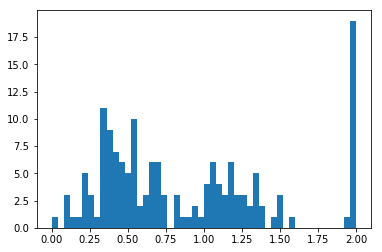

In [91]:
plt.hist(l, bins = 50)

Histograms are different, since there are items, for which loses are big.